In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.pylab import plt

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm,datasets
import itertools

In [2]:
df = pd.read_csv("d:\\tmp\\download\\cc.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower()


In [5]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.drop('id', axis=1, inplace=True) # we do not need id

In [7]:
df['sex'] = df['sex'].map({2:'female', 1:'male'})
df['marriage'] = df['marriage'].map({1:'married', 2:'single', 3:'other', 0: 'other'}) 
df['education'] = df['education'].map({1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown', 0:'unknown'})
df['pay_0'] = df['pay_0'].astype(str) 
df['pay_2'] = df['pay_2'].astype(str) 
df['pay_3'] = df['pay_3'].astype(str) 
df['pay_4'] = df['pay_4'].astype(str) 

df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
X = pd.get_dummies(df[df.columns[:-1]],columns=['sex','marriage','education','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6'])
y = df[df.columns[-1]]
features = X.columns

scaler = preprocessing.StandardScaler()
X = scaler.fit(X).transform(X)

In [9]:
X

array([[-1.13672015, -1.24601985, -0.64250107, ..., -0.02517409,
        -0.03918786, -0.00816524],
       [-0.3659805 , -1.02904717, -0.65921875, ..., -0.02517409,
        -0.03918786, -0.00816524],
       [-0.59720239, -0.16115646, -0.29855966, ..., -0.02517409,
        -0.03918786, -0.00816524],
       ...,
       [-1.05964618,  0.16430256, -0.64722711, ..., -0.02517409,
        -0.03918786, -0.00816524],
       [-0.67427636,  0.59824792, -0.71798186, ..., -0.02517409,
        -0.03918786, -0.00816524],
       [-0.90549825,  1.14067961, -0.04473888, ..., -0.02517409,
        -0.03918786, -0.00816524]])

In [10]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
clfs = {'GradientBoosting': GradientBoostingClassifier(learning_rate= 0.05, max_depth= 6,
                                                        n_estimators=200, max_features = 0.3,
                                                        min_samples_leaf = 5),
        'LogisticRegression' : LogisticRegression(C = 1.0),
        'GaussianNB': GaussianNB(),
        'RandomForest': RandomForestClassifier(n_estimators=10),
        'DecisionTree': tree.DecisionTreeClassifier()
#        ,
#        'SVM': svm.SVC(kernel='linear', C=1.0)
        }

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [14]:
clf.score(X_train,y_train)

0.9995714285714286

In [15]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

cv_scores.mean()

0.7289521525860619

In [16]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [17]:
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)

cv_scores.mean()

0.8184283962746607

ComputingDecisionTree
ComputingLogisticRegression
ComputingRandomForest
ComputingGaussianNB
ComputingGradientBoosting


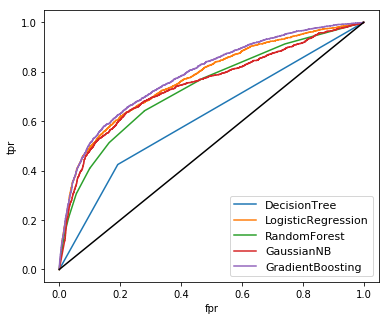

In [18]:
cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score', 'accuracy']
models_report = pd.DataFrame(columns = cols)
feature_importance = pd.DataFrame()

conf_matrix = dict()

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]

    print('Computing{}'.format(clf_name))
    
    if (clf_name == 'RandomForest') | (clf_name == 'GradientBoosting'):
        tmp_fi = pd.Series(clf.feature_importances_)
        feature_importance[clf_name] = tmp_fi
        

    tmp = pd.Series({ 
                     'model': clf_name,
                     'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                     'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                     'precision_score': metrics.precision_score(y_test, y_pred),
                     'recall_score': metrics.recall_score(y_test, y_pred),
                     'f1_score': metrics.f1_score(y_test, y_pred),
                     'accuracy': metrics.accuracy_score(y_test, y_pred)},
                   )

    models_report = models_report.append(tmp, ignore_index = True)

    conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

    plt.figure(1, figsize = (6,5))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot(fpr, tpr, label = clf_name)
    plt.legend(prop={'size':11})
plt.plot([0,1], [0,1], c = 'black')
plt.show()

In [19]:
models_report

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,accuracy
0,DecisionTree,0.224788,0.616265,0.386125,0.424273,0.404301,0.723000
1,LogisticRegression,0.409133,0.772482,0.684112,0.367101,0.477807,0.822222
2,RandomForest,0.330773,0.732948,0.607921,0.307924,0.408788,0.802667
3,GaussianNB,0.211392,0.745548,0.646739,0.119358,0.201524,0.790444
4,GradientBoosting,0.410288,0.786730,0.678182,0.374122,0.482224,0.822000


In [20]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

cv_scores.mean()

0.8103328624553516

In [35]:
for n in range(1, 5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    print (n, cv_scores.mean())

1 0.7293330361299402
2 0.7888106381170867
3 0.7765232901845276
4 0.7963331104955763


In [23]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(X_train)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, y_train, cv=10)

cv_scores.mean()

0.8012848803798993

In [24]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
# try with this kernel  svc = svm.SVC(kernel='sigmoid', C=C)
# and this one svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
cv_scores.mean()

0.8184281923549512

In [33]:
from keras.layers import Dense
from keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(6, input_dim=88, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; rmsprop seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, nb_epoch=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, X_train, y_train, cv=10)
cv_scores.mean()


0.8085238094897498